<hr style="height:10px"> 
 
<div class='container2'>
	<div style='padding: 0 7em 2em 12em;'>
	<h1>Laboratório de Inovação e Automação 1 (LIA 1)</h1>
  <div style="font-size:12pt;float:left;"><b>Projetos de Inteligência Artificial</b></div>
	</div>
</div>


 <hr style="height:5px"> 

    
<h2>Fast.ai 02 - Deployment</h2>

 <hr style="height:2px"> 



In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# Caminhos
dog = '/content/drive/MyDrive/2023.1/IA/LIA/Aula 10 /dog.jpg'
cat = '/content/drive/MyDrive/2023.1/IA/LIA/Aula 10 /cat.jpg'
notebook = '/content/drive/MyDrive/2023.1/IA/LIA/Aula 10 /Fastai02-Classificador_Gato_Cachorro.ipynb'

## Classificador de gatos e cachorros

* ### Criação e treinamento

In [27]:
from fastai.vision.all import *

In [28]:
path = untar_data(URLs.PETS)/'images'

In [29]:
def is_cat(x): return x[0].isupper()

In [30]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func = is_cat,
    item_tfms=Resize(192))

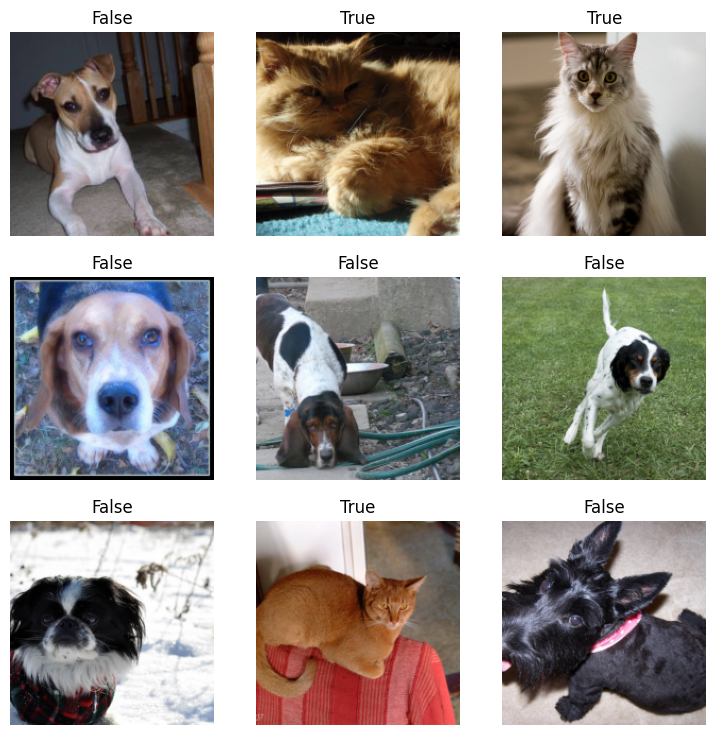

In [31]:
dls.show_batch()

### Exportação do modelo

In [32]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.192427,0.034036,0.012179,00:59


epoch,train_loss,valid_loss,error_rate,time
0,0.081526,0.019838,0.006766,01:01
1,0.053750,0.022357,0.005413,01:00
2,0.025206,0.016626,0.005413,01:00


In [33]:
learn.export('model.pkl')

## Preparação do modelo para deploy com Gradio

In [34]:
#|default_exp app

In [35]:
#|export
!pip install -q gradio
import gradio as gr

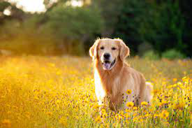

In [36]:
im = PILImage.create('/content/drive/MyDrive/2023.1/IA/LIA/Aula 10 /dog.jpg')
im.thumbnail((192,192))
im

In [37]:
#|export
learn = load_learner('model.pkl')

In [38]:
# %time - tempo para predição

%time learn.predict(im)

CPU times: user 125 ms, sys: 6.99 ms, total: 132 ms
Wall time: 142 ms


('False', tensor(0), tensor([9.9998e-01, 1.9469e-05]))

In [39]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [40]:
classify_image(im)

{'Dog': 0.9999805688858032, 'Cat': 1.9469323888188228e-05}

In [41]:
#|export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = [dog, cat]

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


### Gerando script 

In [42]:
import nbdev

In [43]:
nbdev.export.nb_export(notebook, 'Fastai02-Classificador_Gato_Cachorro')
print('Exportação concluída !')

Exportação concluída !
